<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Act4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 1


---


### **INICIO**

In [1]:
#############################################################################################################################
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline



# Tomar la dirección URL del archivo en formato 'raw'
#Hacer una variable url para luego no tenener que escribir las la url abajo
url = 'https://raw.githubusercontent.com/mariron42/Los-trabajos-de-marcel/main/act3/2033.txt'






#variable que da nombre a las colunas 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'] #Nombres de las columnas

df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
# El separador de datos es de uno o más espacios, sep='\s+'
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 


######################################################################################################
# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()#Esta es la función para respaldar el data frame


#######################################################################################################
# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = "Nulo" 
#creamos la variable "str_Nulo"

df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Aquí es donde reamente se remplasa la variable
#######################################################################################################

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin'] #Lista de columnas (se usará en el for)

#el for es una ciclo donde ejecutaremos nuestra función de conversión de cariables
for cols in cols_list:
  #Funcaión de conversión de variables
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce') #to_numeric es la función 
  #(base de datos(lista de colunas), como llamar a los errores )
  #ese cols va a irse recorriendo en cada columna

df_work1.info()

########################################################################################################

#Sabemos que hay valores que faltan (nosotros los creamos cuando remplazamos los nulos por "")
#Los sumamos
df_work1.isnull().sum()
#nomnredelabasededatos.sinvalores().sumar()
#########################################################################################################
# Creamos una tercer data frame, el "df_work2".
df_work2 = df_work1.copy()
#Leer los primeros renglones de la columna fecha
df_work2['Fecha'].head()
########################################################################################################
# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()
#########################################################################################################
# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year  #agregar columna año
df_work2['Mes'] = df_work2['Fecha'].dt.month #agregar columna mes
########################################################################################################
# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23774 entries, 0 to 23773
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   23774 non-null  object 
 1   Precip  23736 non-null  float64
 2   Evap    20731 non-null  float64
 3   Tmax    23740 non-null  float64
 4   Tmin    23737 non-null  float64
dtypes: float64(4), object(1)
memory usage: 928.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23774 entries, 0 to 23773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   23774 non-null  datetime64[ns]
 1   Precip  23736 non-null  float64       
 2   Evap    20731 non-null  float64       
 3   Tmax    23740 non-null  float64       
 4   Tmin    23737 non-null  float64       
 5   Año     23774 non-null  int64         
 6   Mes     23774 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.3 MB
      

In [ ]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23774 entries, 0 to 23773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   23774 non-null  datetime64[ns]
 1   Precip  23736 non-null  float64       
 2   Evap    20731 non-null  float64       
 3   Tmax    23740 non-null  float64       
 4   Tmin    23737 non-null  float64       
 5   Año     23774 non-null  int64         
 6   Mes     23774 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1944-02-01     0.0   1.2  23.7   4.8  1944  Feb
1 1944-02-02     0.0   1.2  24.6   5.7  1944  Feb
2 1944-02-03     0.0   2.8  21.8   7.4  1944  Feb
3 1944-02-04     0.0   2.1  21.4  11.9  1944  Feb
4 1944-02-05     0.0   2.2  21.2   8.4  1944  Feb


# **Analisis**

Actividad 2. Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())



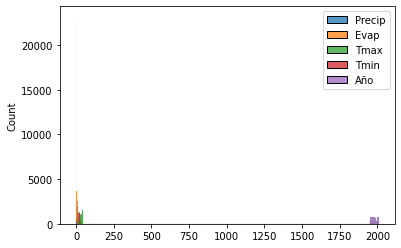

In [ ]:
sns.histplot(df_meteo)

In [ ]:
 sns.kdeplot(df_meteo)



ValueError: ignored

In [ ]:
# Elaboración de Histogramas
# Utilizamos Matplotlib.Pyplot, abreviado como plt 
# NOTA: Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable

plt.hist(df_meteo.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Santa Rosalía BCS')
plt.grid()
plt.show()